In [3]:
import numpy as np
import pandas as pd

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [6]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [7]:
pd.options.display.float_format = '{:.2f}'.format

In [34]:
df_time = pd.read_csv('data/Project1/서울특별시 공공자전거 이용정보(시간대별)_22.12.csv', 
                 encoding='ansi')
time = df_time.copy()
time.head(3)
time.info()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,~10대,1,13.54,0.13,570.00,3
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,NaN,~10대,1,32.81,0.36,1534.33,12
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,NaN,~10대,1,19.10,0.17,720.00,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638969 entries, 0 to 1638968
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   대여일자     1638969 non-null  object 
 1   대여시간     1638969 non-null  int64  
 2   대여소번호    1638969 non-null  int64  
 3   대여소명     1638969 non-null  object 
 4   대여구분코드   1638969 non-null  object 
 5   성별       1112717 non-null  object 
 6   연령대코드    1638969 non-null  object 
 7   이용건수     1638969 non-null  int64  
 8   운동량      1638969 non-null  object 
 9   탄소량      1638969 non-null  object 
 10  이동거리(M)  1638969 non-null  float64
 11  이용시간(분)  1638969 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 150.1+ MB


In [35]:
time['대여일자'].describe()

count        1638969
unique            31
top       2022-12-09
freq           92998
Name: 대여일자, dtype: object

In [10]:
##
time['대여일자'] = pd.to_datetime(time['대여일자'], infer_datetime_format=True)
time['대여일자']

0         2022-12-01
1         2022-12-01
2         2022-12-01
3         2022-12-01
4         2022-12-01
             ...    
1638964   2022-12-31
1638965   2022-12-31
1638966   2022-12-31
1638967   2022-12-31
1638968   2022-12-31
Name: 대여일자, Length: 1638969, dtype: datetime64[ns]

In [11]:
time["년"] = time["대여일자"].dt.year
time["월"] = time["대여일자"].dt.month
time["일"] = time["대여일자"].dt.day

In [12]:
# 대여일자별 빈도
time_day = time['일'].value_counts().sort_index()

<AxesSubplot:xlabel='날짜', ylabel='대여건수'>

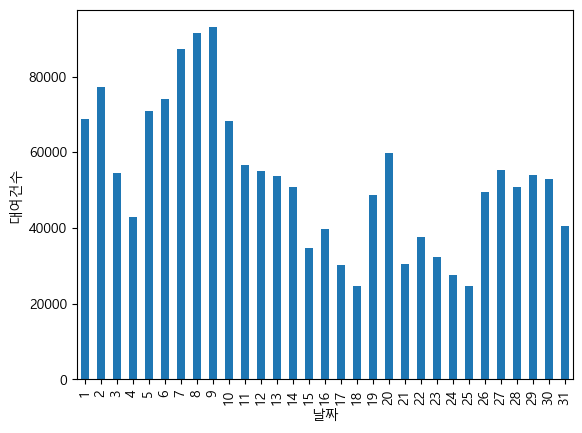

In [13]:
time_day.plot.bar(xlabel = '날짜', ylabel = '대여건수')

In [14]:
monday = len(time.query('대여일자.dt.dayofweek == 0'))
tuesday = len(time.query('대여일자.dt.dayofweek == 1'))
wednesday = len(time.query('대여일자.dt.dayofweek == 2'))
thursday = len(time.query('대여일자.dt.dayofweek == 3'))
friday = len(time.query('대여일자.dt.dayofweek == 4'))
saturday = len(time.query('대여일자.dt.dayofweek == 5'))
sunday = len(time.query('대여일자.dt.dayofweek == 6'))

In [15]:
day_week = pd.DataFrame(data = [monday,tuesday,wednesday,
                                thursday,friday,
                                saturday,sunday], 
                        index =['월','화','수','목','금','토','일'],
                     columns =['대여건수'])
day_week

,대여건수
월,224111
화,242966
수,219406
목,286849
금,295312
토,221473
일,148852


<AxesSubplot:>

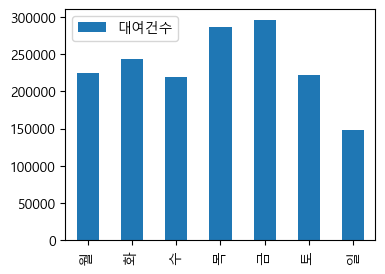

In [23]:
#요일별 사용자 수
day_week.plot.bar(figsize = (4,3))

In [19]:
time['대여시간'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [31]:
time2 =pd.DataFrame(time['대여시간'].value_counts()).sort_index()
time2

,대여시간
0,39004
1,29344
2,22189
3,14941
4,10437
5,17693
6,33778
7,77618
8,132780
9,81351


<AxesSubplot:xlabel='대여한 시간대', ylabel='대여건수'>

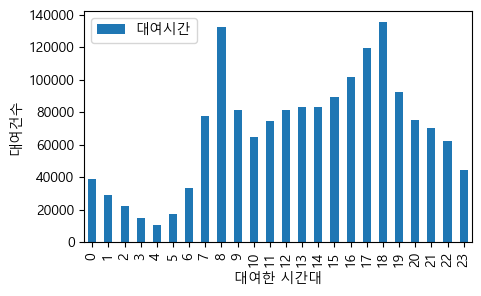

In [32]:
# 대여시간(0시~1시, 23시~ 24시)
time2.plot.bar(xlabel = '대여한 시간대', ylabel = '대여건수', figsize = (5,3))